In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/insurance.csv')
df.shape

(1338, 7)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 흡연자는 charges가 높을거라 예상

<AxesSubplot:xlabel='smoker', ylabel='charges'>

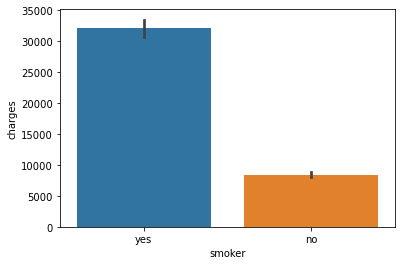

In [7]:
sns.barplot(data=df, x='smoker', y='charges')

### children수에 따라 흡연 및 charges에 값을 알아보자

<AxesSubplot:xlabel='smoker', ylabel='charges'>

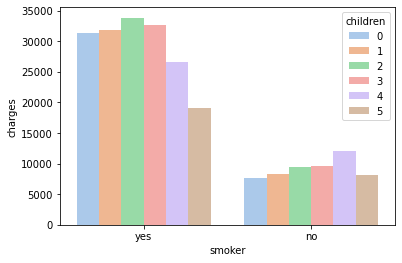

In [43]:
sns.barplot(data=df, x='smoker', y='charges', hue='children', ci=None,
            palette = 'pastel')

#### 전반적으로 흡연자 중에서는 자녀가 많을수록 charges가 낮고, 비흡연자는 큰 차이를 보이지 않았다

### children에는 무슨값이 들어있을까

In [33]:
df[['children']]

,children
0,0
1,1
2,3
3,0
4,0
...,...
1333,3
1334,0
1335,0
1336,0


##### Number of Children of the Policyholder -> 보험계약자의 자녀 수

In [6]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### 흡연자가 charges가 높은걸 확인했으니까, 성별별 흡연여부 확인

<AxesSubplot:xlabel='smoker', ylabel='charges'>

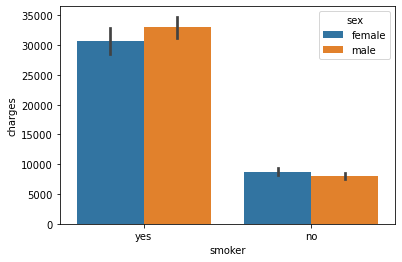

In [15]:
sns.barplot(data=df, x='smoker', y='charges', hue='sex')

### 나이별 bmi 확인

plt.figure(figsize=(12,8))
sns.pointplot(data=df, x='age', y='bmi', hue='sex', ci=None)

##### 눈에 띄는 부분은 20대 후반, 30대 중반, 50대 중반에서 여성에 bmi가 현저히 낮고, 40대 중반에서 남성에 bmi가 현저히 낮다는 점이다

<AxesSubplot:>

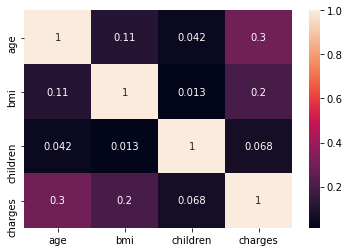

In [46]:
sns.heatmap(df.corr(), annot=True)

### heatmap으로 확인해봤을때 charges와는 상대적으로 age와 수치가 높은 걸 확인했다

<AxesSubplot:xlabel='age', ylabel='charges'>

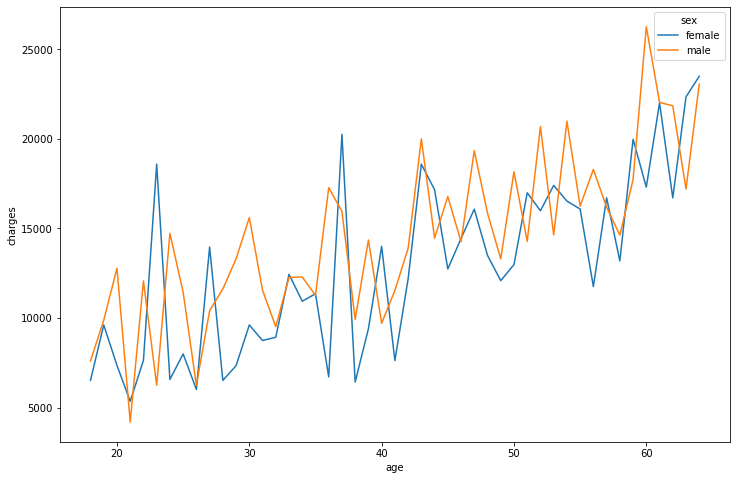

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='age', y='charges', hue='sex', ci=None)